In [3]:
include("src/QuickFind.jl")
include("src/QuickUnion.jl")
include("src/WQuickUnion.jl")
include("src/DisjointSet.jl")

using BenchmarkTools
using StatsBase
using JLD
import PyPlot; const plt = PyPlot;

In [4]:
d = load("figures/benchmark.jld") # <- change this file name to the save you want to load. 

Dict{String,Any} with 11 entries:
  "benchmarkRootValuesDJU"  => BenchmarkTools.Trial[4.874 ns 4.873 ns … 4.876 n…
  "benchmarkFindValuesQF"   => BenchmarkTools.Trial[3.499 ns 3.503 ns … 3.676 n…
  "benchmarkUniteValuesWQU" => BenchmarkTools.Trial[6.264 ns 6.260 ns … 6.261 n…
  "benchmarkRootValuesWQU"  => BenchmarkTools.Trial[3.495 ns 3.493 ns … 3.494 n…
  "benchmarkFindValuesWQU"  => BenchmarkTools.Trial[5.571 ns 5.571 ns … 5.574 n…
  "benchmarkFindValuesDJU"  => BenchmarkTools.Trial[7.668 ns 7.638 ns … 7.653 n…
  "benchmarkUniteValuesDJU" => BenchmarkTools.Trial[10.696 ns 10.686 ns … 10.69…
  "benchmarkFindValuesQU"   => BenchmarkTools.Trial[5.564 ns 5.572 ns … 5.575 n…
  "benchmarkUniteValuesQF"  => BenchmarkTools.Trial[31.253 ns 31.241 ns … 31.18…
  "benchmarkRootValuesQU"   => BenchmarkTools.Trial[3.492 ns 3.493 ns … 3.494 n…
  "benchmarkUniteValuesQU"  => BenchmarkTools.Trial[5.913 ns 5.909 ns … 5.912 n…

In [6]:
ns = [100, 1000, 2500, 5000, 10000, 50000, 100000, 250000, 500000]
percents = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
xvals = zeros(9, 6)
for k = 1:Base.length(ns)
    xvals[k, :] .= ns[k]
end

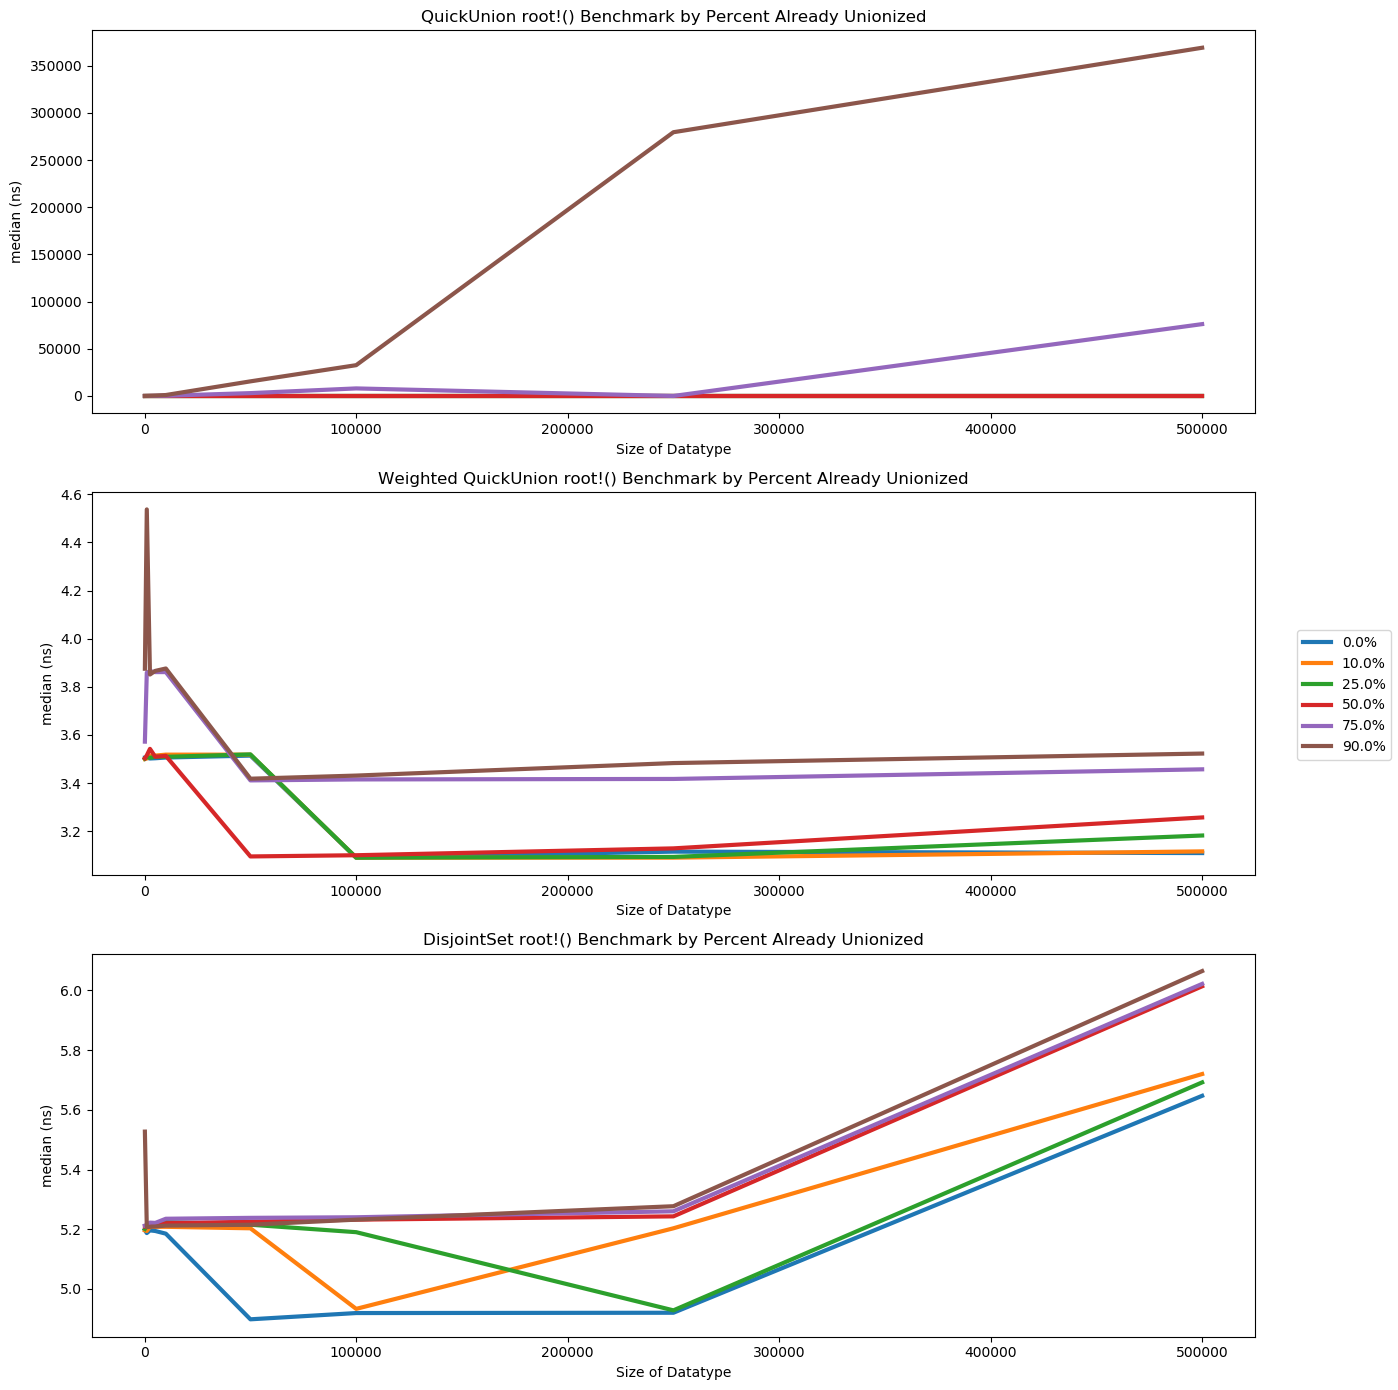

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3) 
ax1.plot(xvals, map(k -> median(k).time, d["benchmarkRootValuesQU"]), lw=3)
ax1.set_ylabel("median (ns)") 
ax1.set_xlabel("Size of Datatype")
ax1.set_title("QuickUnion root!() Benchmark by Percent Already Unionized")

ax2.plot(xvals, map(k -> median(k).time, d["benchmarkRootValuesWQU"]), lw=3)
ax2.set_ylabel("median (ns)") 
ax2.set_xlabel("Size of Datatype")
ax2.set_title("Weighted QuickUnion root!() Benchmark by Percent Already Unionized")

ax3.plot(xvals, map(k -> median(k).time, d["benchmarkRootValuesDJU"]), lw=3)
ax3.set_ylabel("median (ns)") 
ax3.set_xlabel("Size of Datatype")
ax3.set_title("DisjointSet root!() Benchmark by Percent Already Unionized")
fig.legend(["$(k*100)%" for k in percents], loc="right")
fig.set_figheight(14)
fig.set_figwidth(14)
fig.tight_layout()
plt.subplots_adjust(right=0.9)
plt.show()


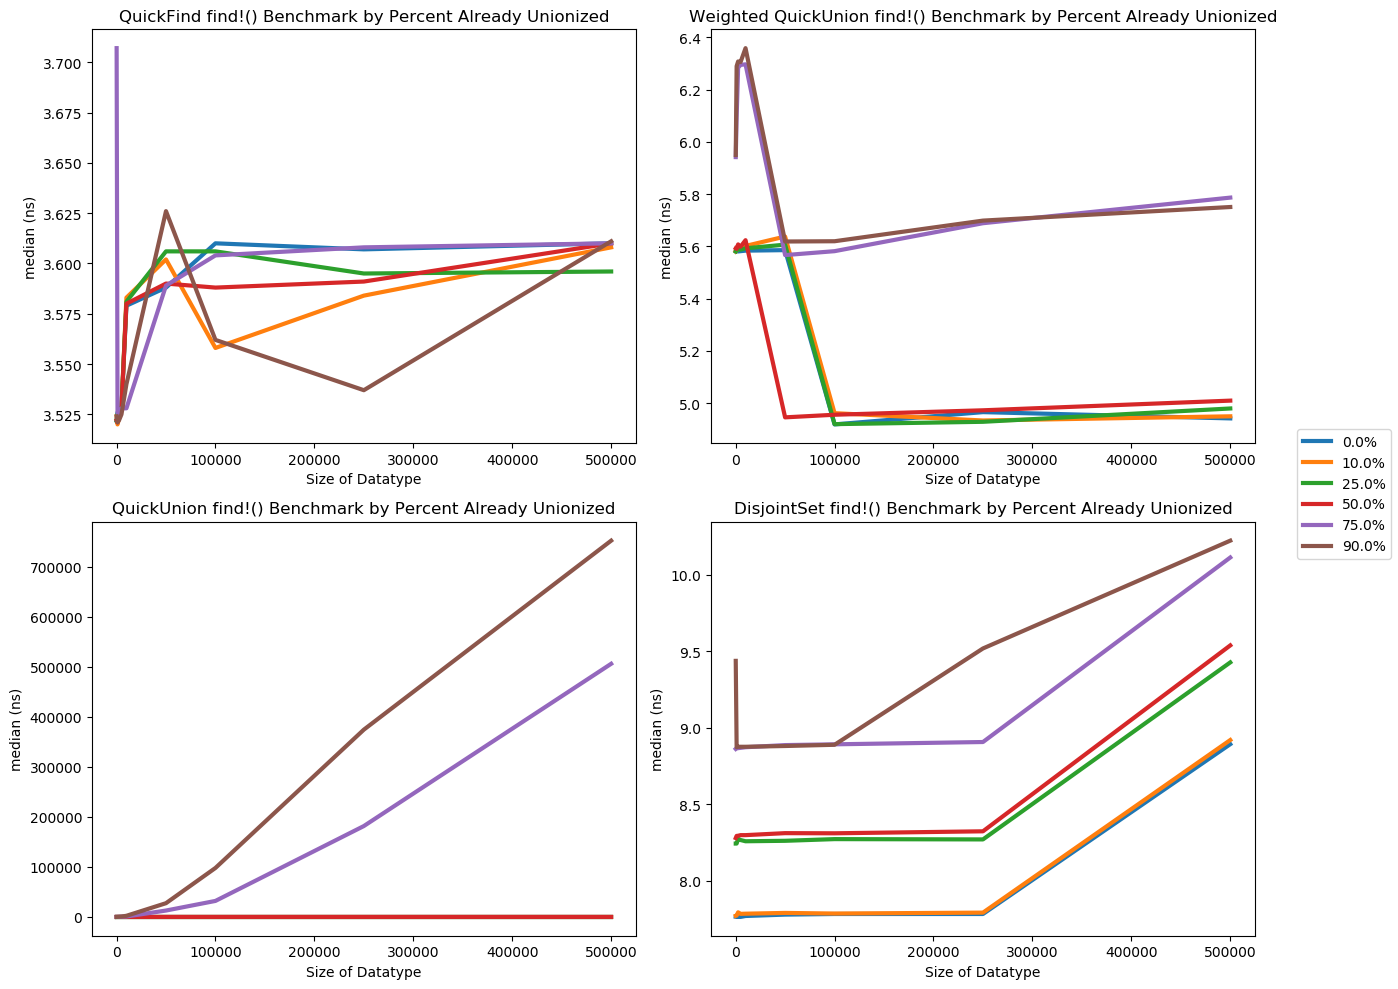

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2) 
ax1.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesQF"]), lw=3)
ax1.set_ylabel("median (ns)") 
ax1.set_xlabel("Size of Datatype")
ax1.set_title("QuickFind find!() Benchmark by Percent Already Unionized")

ax2.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesQU"]), lw=3)
ax2.set_ylabel("median (ns)") 
ax2.set_xlabel("Size of Datatype")
ax2.set_title("QuickUnion find!() Benchmark by Percent Already Unionized")

ax3.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesWQU"]), lw=3)
ax3.set_ylabel("median (ns)") 
ax3.set_xlabel("Size of Datatype")
ax3.set_title("Weighted QuickUnion find!() Benchmark by Percent Already Unionized")

ax4.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesDJU"]), lw=3)
ax4.set_ylabel("median (ns)") 
ax4.set_xlabel("Size of Datatype")
ax4.set_title("DisjointSet find!() Benchmark by Percent Already Unionized")
fig.legend(["$(k*100)%" for k in percents], loc="right")
fig.set_figheight(10)
fig.set_figwidth(14)
fig.tight_layout()
fig.subplots_adjust(right=0.9)
plt.show()


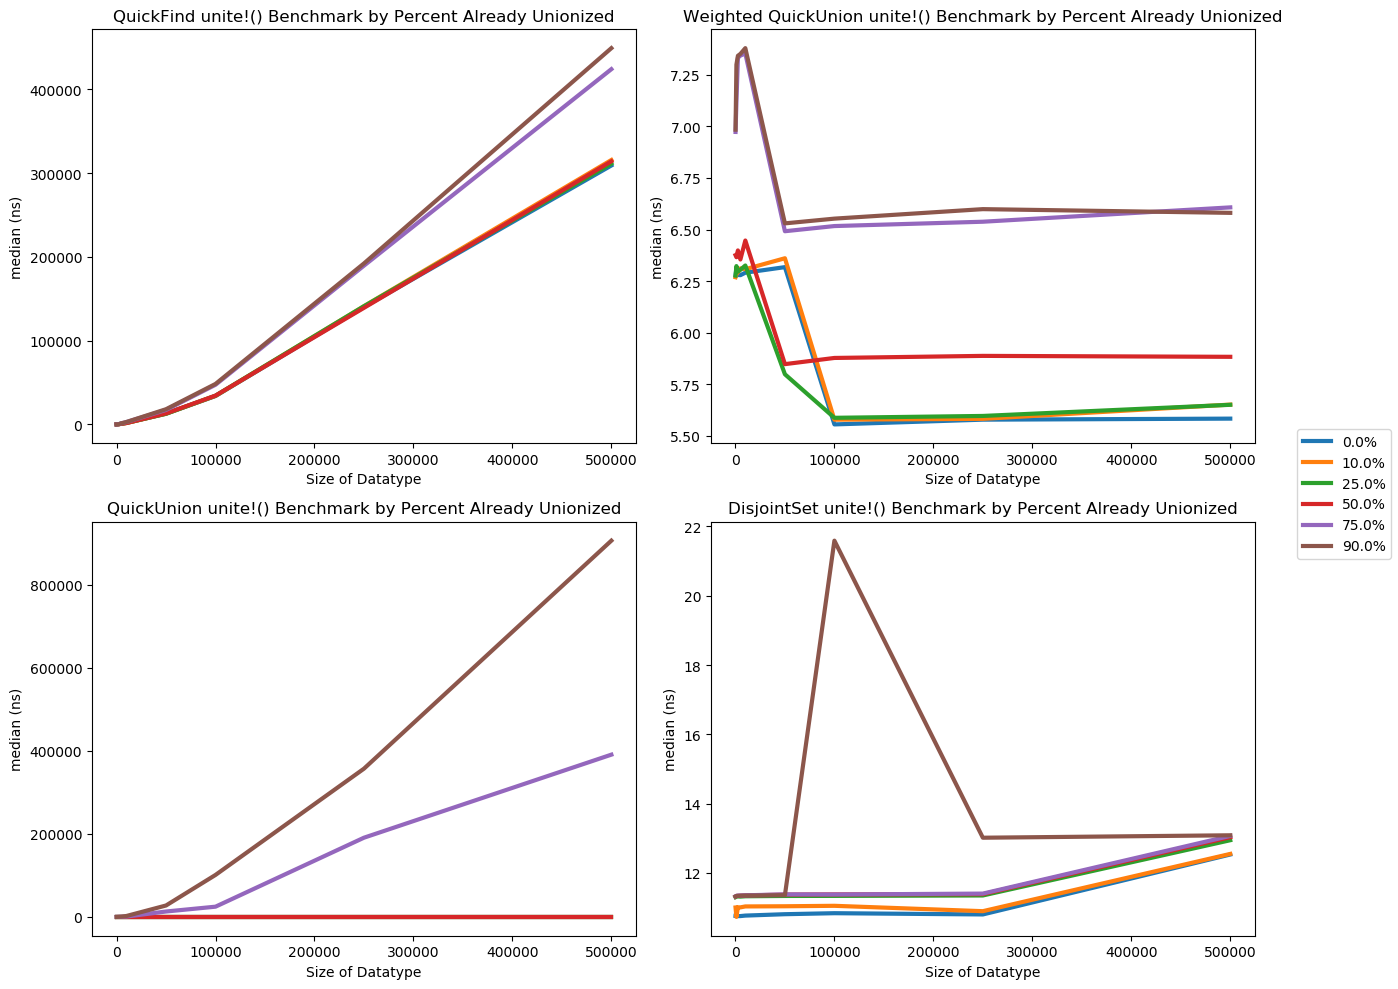

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2) 
ax1.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesQF"]), lw=3)
ax1.set_ylabel("median (ns)") 
ax1.set_xlabel("Size of Datatype")
ax1.set_title("QuickFind unite!() Benchmark by Percent Already Unionized")

ax2.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesQU"]), lw=3)
ax2.set_ylabel("median (ns)") 
ax2.set_xlabel("Size of Datatype")
ax2.set_title("QuickUnion unite!() Benchmark by Percent Already Unionized")

ax3.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesWQU"]), lw=3)
ax3.set_ylabel("median (ns)") 
ax3.set_xlabel("Size of Datatype")
ax3.set_title("Weighted QuickUnion unite!() Benchmark by Percent Already Unionized")

ax4.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesDJU"]), lw=3)
ax4.set_ylabel("median (ns)") 
ax4.set_xlabel("Size of Datatype")
ax4.set_title("DisjointSet unite!() Benchmark by Percent Already Unionized")
fig.legend(["$(k*100)%" for k in percents], loc="right")
fig.set_figheight(10)
fig.set_figwidth(14)
fig.tight_layout()
fig.subplots_adjust(right=0.9)
plt.show()